# Collaborators 

### Problem 2 &3 : Zed Hoffman-Weldon

### Problem 1-3: Kerryn van Rooyen


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Notch Digital Filter (6 marks, 3/2/1)

A notch filter is a filter that passes almost all frequencies with unit amplitude, except for a narrow
range of frequencies centered on the rejection frequency $f_0$ (at which frequency nothing is passed).

A simple notch digital filter has a z-transform

$$ W(z) = MF(z) F(z^*)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$

where $M$ is a normalization factor, $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q$, $f_s$ 
is the sampling rate ($f_s = 1 / \Delta$) and $\epsilon$ is a small positive number ($0 < \epsilon \ll 1$).

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real? 
 2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.
 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?

_Hint_: For Part 2, $W(f)$ is obtained by $W(z = e^{-i \omega \Delta}$). For Part 3, you don't have to
compute the FWHM value analytically (although it can be done); an inspection of the discrete array of $|W(f)|^2$
vector is sufficient. Note here $f_\text{fwhm}$ is in terms of frequency (1/year), not angular frequency.

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real? 
    
    Answer:
    The poles of the system are $p$ and $p^*$, while the zeros are $q$, and $q^*$. Recall $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) e^{-i 2 \pi f_0 / f_s}$
    
    A system is stable if the poles are outside of the unit circle. Since the radius of the poles is $1 + \epsilon$ the poles are just outside of the unit circle, and hence the system is stable. Recall $0 < \epsilon \ll 1$.
    
    The filter is complex? derb
    
    
2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.
    
    
    

Text(4, 0.5, 'FWHM $\\approx$1.813')

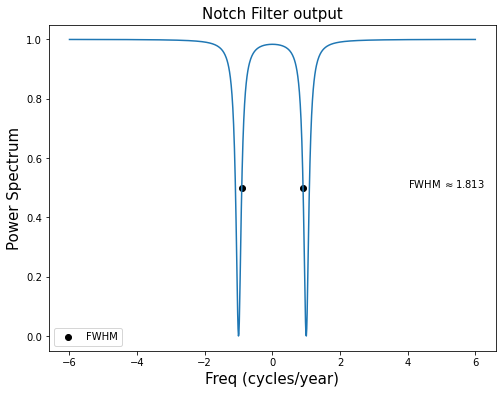

In [2]:
#2 answer 
def notch_filter(f, m, e, fs, f0):
    
    i = complex(0,1)
    z = np.exp(-i*(1/fs)*f*2*np.pi)
    
    q = np.exp(-i *2*np.pi*f0/fs)
    p = (1+e)*q
    
    q_star = np.conjugate(q)
    p_star = np.conjugate(p)
    
    notch = m*((z-q)/(z-p))*((z-q_star)/(z-p_star))
    
    return notch
    

# lets define some args and plot 
fs = 12
f0 =1
m = 1.05
e = 0.05
f = np.linspace(-fs/2, fs/2, 1000)

notch = notch_filter(f, m, e, fs, f0)

max_val = np.max(np.abs(notch)**2)

indexs = np.argmin(np.abs(np.abs(notch)**2 - 0.5*max_val))
plt.figure(figsize=(8,6))
plt.scatter(f[indexs], (np.abs(notch)**2)[indexs], color='k')
plt.scatter(-f[indexs], (np.abs(notch)**2)[indexs], color='k', label='FWHM')
plt.plot(f, np.abs(notch)**2)
plt.xlabel('Freq (cycles/year)', size=15)
plt.ylabel('Power Spectrum',size=15)
plt.title('Notch Filter output',size=15)
plt.legend()
plt.text(4, 0.5, r'FWHM $\approx$' + str(np.abs(f[indexs] - -f[indexs]))[0:5])

 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?
 
 Changing $f_0$ changes the values of the FWHM, a smaller $f_0$, results in a smaller FWHM. I would like to indicate that a smaller epsilon results in a sharper filter - one that more centered on the rejected frequencies 


# Implementing the Notch Filter (6 marks, 2/2/1/1)

Notch filter introduced in section 1 can be written out fully as

$$ W(z) = \frac{N(z)}{D(z)} = \frac{a + bz + cz^2}{1 + Bz + Cz^2} $$

A filter of the form above can be implemented as two filters in succession: first the 'numerator filter'
`[a b c]` as a 3-term direct convolution, then the 'denominator filter' as the inverse filter of the 3-term
filter `[1 B C]` by feedback filtering.

 1. What are the values of a; b; c; B; C for the notch filter defined in Question 1.2?
 2. Write a function for a general rational digital filter with numerator and denominator
    coefficients N and D which produces the filtered time series $y$ for a given input $x$,
    `y = ratFilter(N,D,x)`. 
 3. Use `ratFilter` function to determine the impulse response of this notch filter (i.e., the output
    of this filter when the input is a discrete delta function). Define the impulse using $dt=1/f_s$ and $t=0$ to $t_{max}=100$ years (i.e. $1200$ samples). Plot the impulse response from $0$ to $6$ years. Speculate on how the impulse response would change if we halve the $f_\text{fwmh}$ value.
 4. Fourier transform the impulse response to obtain the frequency response $|W(f)|$
    of this notch filter. Plot it on top of the magnitude of the theoretical spectrum calculated based on the z-transform, with $f$ ranging from $0$ to $6$ cycles per year.

Answer:

1. By using Wolfram to do the math for us, we can foil the numerator and the denomenator of the fractions from 1. This results in a $(qq^* - qz - q^* z + z^2$ for the numerator therefore $a=qq^*$, $b= -q -q^*$, and $c=1$. repeating for the denominator: $B= (-p -p^*)/pp^*$, and $c=1/pp^*$

Halfing the FWHM frequency value should make the (inverse spikes) narrower (by half the width!) this would reject fewer frequency domain information around the spike

/tmp/ipykernel_444752/3362045473.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  arr[0] = X[0]/ D[0]
/tmp/ipykernel_444752/3362045473.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  arr[i] = i_val


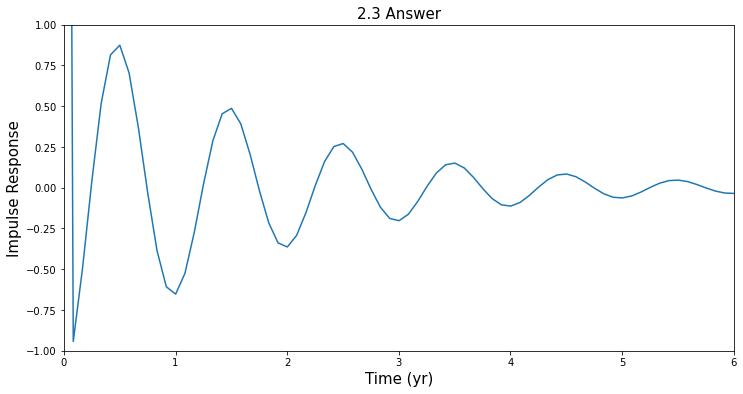

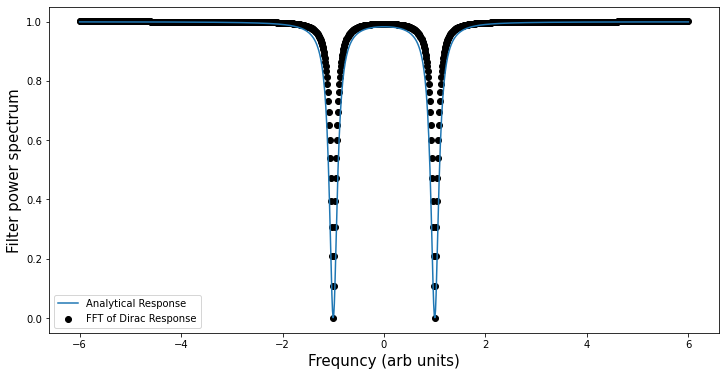

In [3]:
def inv_filter(X,D):
    arr = np.zeros(len(X)-len(D) +1)
    arr[0] = X[0]/ D[0]
   # my_sum = 0
    
    for i in range(1, len(arr)):
        my_sum = 0
        for j in range(1, len(D)):
            if i-j>=0:
                my_sum += arr[i-j]*D[j]
                
        i_val = (X[i] -my_sum) * (1/D[0])
        arr[i] = i_val
    return arr

def ratFilter(X, N, D):
    D = np.asarray(D)
    N = np.asarray(N)
    D = np.concatenate(([1],D))
    
    con = np.convolve(X, N)
    arr = inv_filter(con, D)
    return arr

# lets do some plots
fs = 12
f0 = 1
M = 1.05
e = 0.05
i = complex(0,1)
q = np.exp(-i *2*np.pi*f0/fs)
p = (1+e)*q
q_star = np.conjugate(q)
p_star = np.conjugate(p)
delta_arr = np.zeros(1200)
delta_arr[0] = fs 


N = [1/M, -1*(q + q_star)*(1/M), 1/M]
D = [-1*(p+p_star)/((1+e)**2), 1/((1+e)**2)]
dirac_resp = ratFilter(delta_arr,N, D)


time = np.linspace(0, 100, 1200)
plt.figure(figsize=(12,6))
plt.plot(time, dirac_resp)
plt.xlabel('Time (yr)', size=15)
plt.ylabel('Impulse Response', size=15)
plt.xlim(0,6)
plt.ylim(-1,1)
plt.title('2.3 Answer', size=15)
plt.show()

# 2.4
plt.figure(figsize=(12,6))
plt.plot(f, np.abs(notch)**2, label="Analytical Response")
dt = time[1] - time[0]
fft1 = np.fft.fft(dirac_resp) * dt
fft1 = np.fft.fftshift(fft1)
plt.xlabel('Frequncy (arb units)', size=15)
plt.ylabel('Filter power spectrum', size=15)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )
plt.scatter(f_axis1, np.abs(fft1), color='k', label='FFT of Dirac Response')
plt.legend()

# The Mauna Loa $CO_2$ Data (6 marks, 1/1/1/1/2)

The provided file `co2data.py` contains carbon dioxide values (in parts per million) measured
every month at the Mauna Loa Observatory in Hawaii, from January 1965 to December 2022.
They show clearly a rising trend in atmospheric $CO_2$. The trend is overlaid with a strong annual
oscillation. Your job is to remove the annual oscillation and display the trend more clearly. There
are two possible approaches: (a) you could apply your notch filter to the series to remove this
annual variation, or (b) you could Fourier transform it with `fft`, remove the annual variation by
setting the spectrum at appropriate frequencies to zero, and transform back to the time domain with
`ifft`.

Write code to accomplish the following:

 1. Before applying the filters, it is helpful to remove the trend of the signal using numpy
    function `polyfit`. Fit a straight line to your data and then detrend your data by removing the
    straight line. Plot both the original data and the detrended data.
 2. Apply your notch filter to the detrended data and add back the trend.
 3. FT the detrended data into the frequency domain, and plot both its amplitude and phase
    spectrum. Make another plot that zooms in at $f = [0, 3.5]$ cycles per year. Now set the
    Fourier spectrum corresponding to frequencies beyond $0.9$ cycles per year to zero (keeping in mind symmetry requirements), which
    effectively removes the annual oscillation. Transform the spectrum back to time domain and
    add back the trend.
 4. Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data
    from Part 3 on top of each other with different colors. Which method gives more satisfactory
    result? But can you think of any advantages/disadvantages in using either method?
 5. Now try redo Parts 2, 3, and 4 with the original data, not the detrended data. Of course you
    don't need to add back the trend after filtering any more. Display your results and comment
    on the importance of detrending before applying the filters.

In [4]:
from co2data import *

In [5]:
#co2Data
co2TimeRange = np.asarray(co2TimeRange)
time=np.linspace(co2TimeRange[0],co2TimeRange[1],len(co2Data))


In [6]:

#co2Values= 

# convert date table to a data vector
co2Data = co2Values.flatten()

co2TimeRange = [1965.0411, 2022.9583]
# hint: to generate time vector:
# time=linspace(co2TimeRange(0),co2TimeRange(1),length(co2Data));

#Notes:
#Monthly values are expressed in parts per million (ppm)



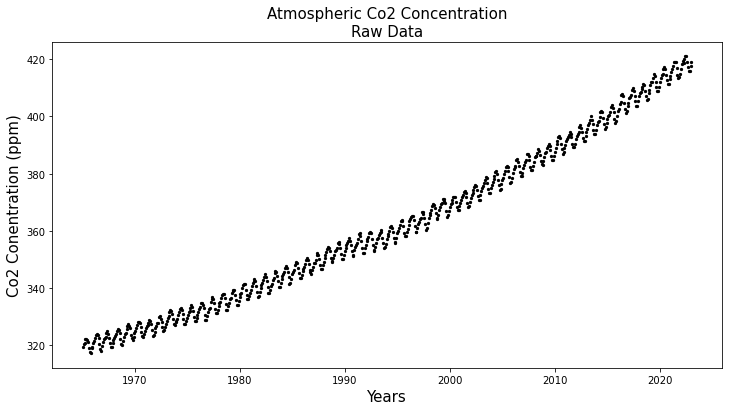

[ 1.70834175e+00 -3.04396134e+03] [[ 7.83034697e-05 -1.56137095e-01]
 [-1.56137095e-01  3.11359272e+02]]


Text(0.5, 1.0, 'Atmospheric Co2 Concentration\nLinear Trend Removed')

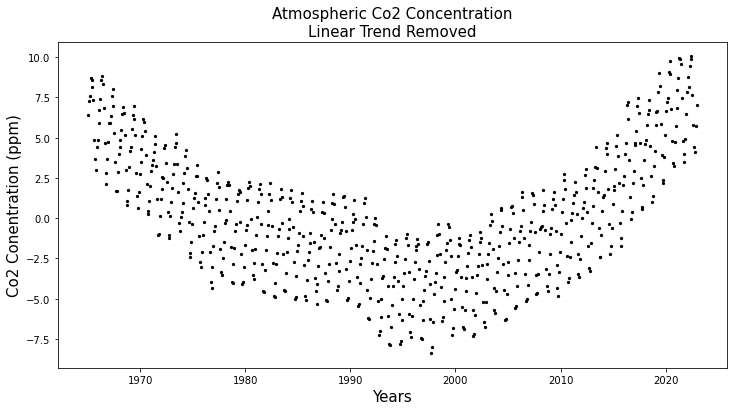

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(time, co2Data, color='k', label='co2Data',s=5)
#plt.plot(time, co2Data, color='k', label='co2Data')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Co2 Conentration (ppm)', fontsize=15)
plt.title('Atmospheric Co2 Concentration\nRaw Data', fontsize=15)
#
plt.show()
from scipy.optimize import curve_fit

# use scip curve fit

def lin_model(x, a,c):
    return a*x +c


popt, pcov = curve_fit(f=lin_model, xdata=time, ydata=co2Data)
print(popt,pcov)

plt.figure(figsize=(12,6))
#plt.plot(time, co2Data, color='k', label='co2Data')
#plt.plot(time, lin_model(time, *popt), color='k', label='Lin model')
plt.scatter(time, co2Data - lin_model(time, *popt), color='k', label='Detrend',s=5)
#plt.plot(time, co2Data, color='k', label='co2Data')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Co2 Conentration (ppm)', fontsize=15)
plt.title('Atmospheric Co2 Concentration\nLinear Trend Removed', fontsize=15)


In [8]:
# ah maybe climate isnt that bad? Fox news should hire me to "adjust" their data

/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6.15 6.5
12.45 12.7


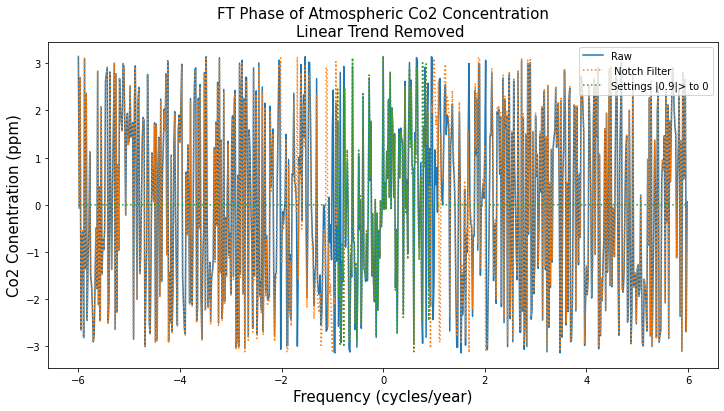

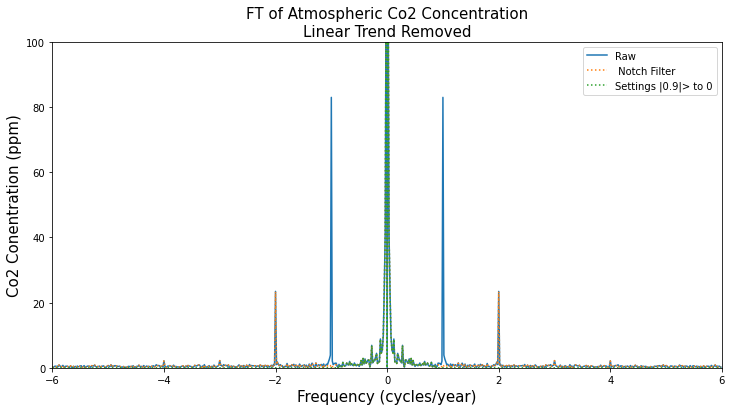

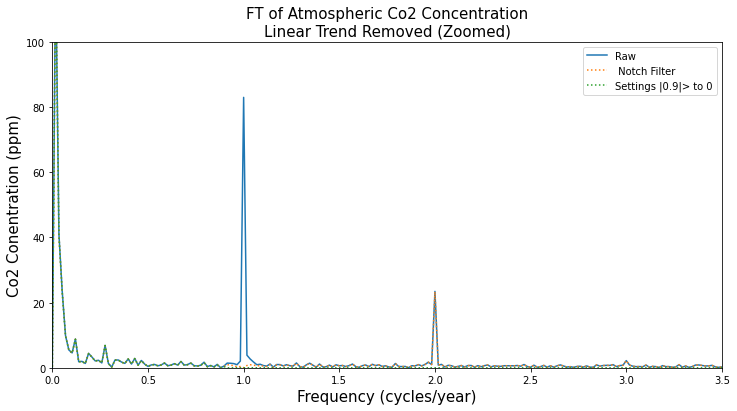

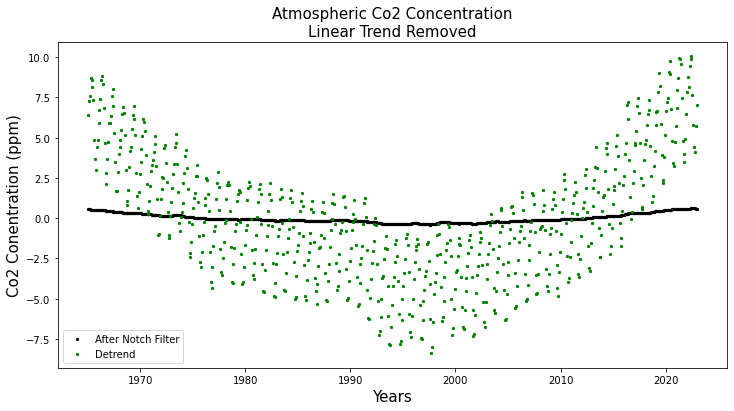

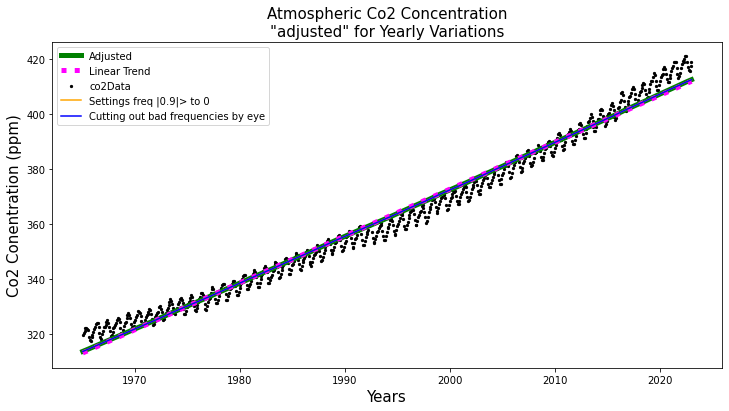

6.15 6.5
12.45 12.7


/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


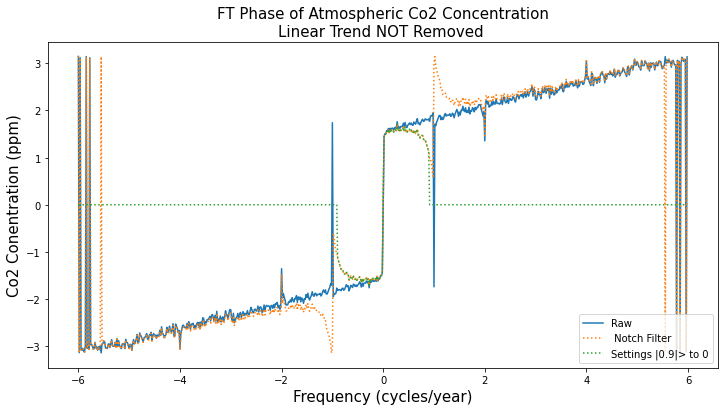

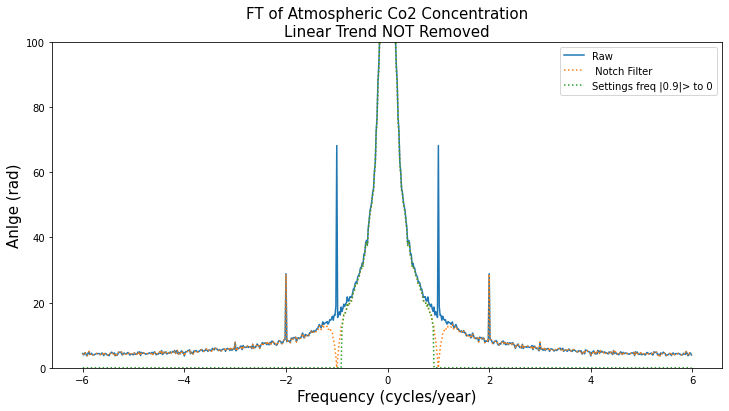

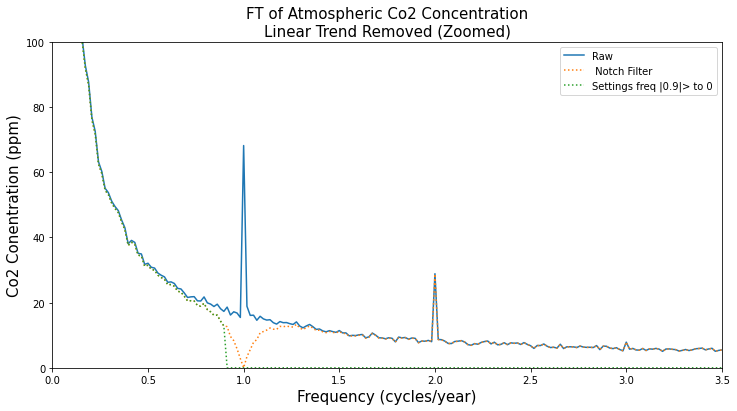

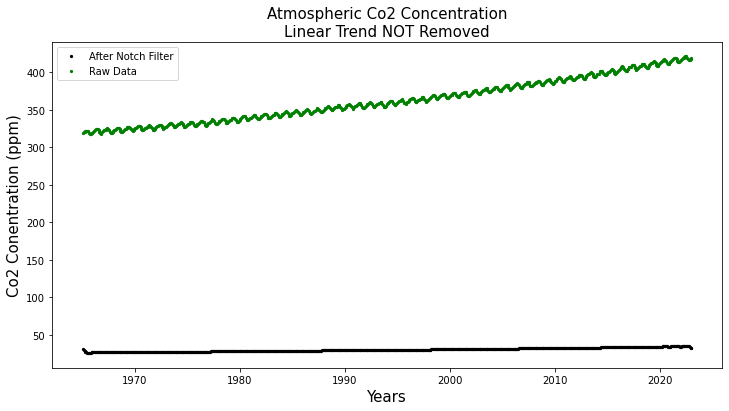

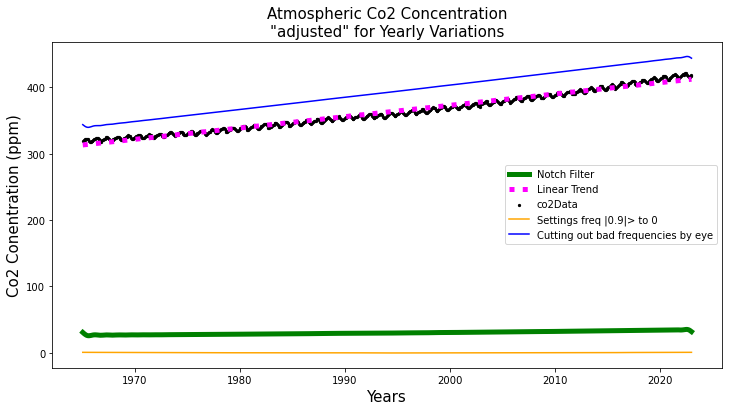

In [9]:
# fourier transforms
# numpy.fft.fft(g) * dt
dt = time[1] - time[0]
fft1 = np.fft.fft(co2Data - lin_model(time, *popt)) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )

#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')


plt.figure(figsize=(12,6))
plt.plot(f_axis1, np.angle(fft1),label='Raw')
fft1 = notch_filter(f_axis1, m, e, fs, f0) * fft1
plt.plot(f_axis1, np.angle(fft1),label=' Notch Filter', linestyle=':')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
#plt.xlim(12.4,12.7)
#plt.ylim(0, 100)
f_cutout = fft1
f_cutout[np.abs(f_axis1)>=0.9] =0
plt.plot(f_axis1, np.angle(f_cutout),label='Settings |0.9|> to 0', linestyle=':')
plt.ylabel('Co2 Conentration (ppm)', size=15)
plt.xlabel('Frequency (cycles/year)', size=15)
plt.title('FT Phase of Atmospheric Co2 Concentration\nLinear Trend Removed ', size=15)
plt.legend()

dt = time[1] - time[0]
fft1 = np.fft.fft(co2Data - lin_model(time, *popt)) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )




plt.figure(figsize=(12,6))
plt.plot(f_axis1, np.abs(fft1),label='Raw')
fft1 = notch_filter(f_axis1, m, e, fs, f0) * fft1
plt.plot(f_axis1, np.abs(fft1),label=' Notch Filter', linestyle=':')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
#plt.xlim(12.4,12.7)
plt.ylim(0, 100)
f_cutout = fft1
f_cutout[np.abs(f_axis1)>=0.9] =0
plt.plot(f_axis1, np.abs(f_cutout),label='Settings |0.9|> to 0', linestyle=':')
plt.ylabel('Co2 Conentration (ppm)', size=15)
plt.xlabel('Frequency (cycles/year)', size=15)
plt.title('FT of Atmospheric Co2 Concentration\nLinear Trend Removed', size=15)
plt.legend()
plt.xlim(-6,6)

dt = time[1] - time[0]
fft1 = np.fft.fft(co2Data - lin_model(time, *popt)) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )


plt.figure(figsize=(12,6))
plt.plot(f_axis1, np.abs(fft1),label='Raw')
fft1 = notch_filter(f_axis1, m, e, fs, f0) * fft1
plt.plot(f_axis1, np.abs(fft1),label=' Notch Filter', linestyle=':')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
#plt.xlim(12.4,12.7)
plt.ylim(0, 100)
f_cutout = fft1
f_cutout[np.abs(f_axis1)>=0.9] =0
plt.plot(f_axis1, np.abs(f_cutout),label='Settings |0.9|> to 0', linestyle=':')
plt.ylabel('Co2 Conentration (ppm)', size=15)
plt.xlabel('Frequency (cycles/year)', size=15)
plt.title('FT of Atmospheric Co2 Concentration\nLinear Trend Removed (Zoomed)', size=15)
plt.legend()
plt.xlim(0,3.5)

# lets find peaks
# set secondary peaks to 0


ifft = np.fft.ifft(np.fft.ifftshift(fft1))
f_axis2 = np.fft.fftshift( np.fft.fftfreq(len(ifft), dt) )
ifft2 = np.fft.ifft(np.fft.ifftshift(f_cutout))
plt.plot(time, ifft2, color='orange', label='Settings freq |0.9|> to 0')




    
plt.figure(figsize=(12,6))
plt.scatter(time, ifft, color='k', label='After Notch Filter',s=5)
plt.scatter(time, co2Data - lin_model(time, *popt), color='green', label='Detrend',s=5)
#plt.plot(time, co2Data, color='k', label='co2Data')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Co2 Conentration (ppm)', fontsize=15)
plt.legend()
plt.title('Atmospheric Co2 Concentration\nLinear Trend Removed', fontsize=15)

plt.figure(figsize=(12,6))
plt.plot(time, ifft + lin_model(time, *popt), color='green', label='Adjusted',linewidth=5)
plt.plot(time, lin_model(time, *popt), color='magenta', label='Linear Trend', linestyle=':', linewidth=5)
plt.scatter(time, co2Data, color='k', label='co2Data', s=5)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Co2 Conentration (ppm)', fontsize=15)
plt.legend()
plt.title('Atmospheric Co2 Concentration\n"adjusted" for Yearly Variations', fontsize=15)


#lets cut out these frequencies by hand!

# bad freqencies
# 6.15 - 6.40
# 12.45 - 12.7

bad_freq_start = np.asarray([6.15, 12.45])
bad_freq_stop = np.asarray([6.50, 12.7])

for i in range(len(bad_freq_start)):
    w_start = bad_freq_start[i]
    w_end = bad_freq_stop[i]
    
    print(w_start, w_end)
    
    # find idexes 
    start_i = np.argmin(np.abs((2*np.pi*f_axis1)-w_start))
    stop_i = np.argmin(np.abs((2*np.pi*f_axis1)- w_end))
 
    # set to 0
    fft1[start_i:stop_i] =0
    
    # same but for - w
    w_start = -1*bad_freq_start[i]
    w_end = -1*bad_freq_stop[i]
    
    
    
    start_i = np.argmin(np.abs((2*np.pi*f_axis1)-w_start))
    stop_i = np.argmin(np.abs((2*np.pi*f_axis1)- w_end))
  
   
    # set to 0
    fft1[stop_i:start_i] =0

    
    

ifft = np.fft.ifft(np.fft.ifftshift(fft1))
f_axis2 = np.fft.fftshift( np.fft.fftfreq(len(ifft), dt) )

    
#plt.figure(figsize=(12,6))
ifft2 = np.fft.ifft(np.fft.ifftshift(f_cutout))
plt.plot(time, ifft2 + lin_model(time, *popt), color='orange', label='Settings freq |0.9|> to 0')
plt.plot(time, ifft + lin_model(time, *popt), color='blue', label='Cutting out bad frequencies by eye')
plt.legend()
plt.show()

# now again without detrending it 
# no detrend
dt = time[1] - time[0]
fft1 = np.fft.fft(co2Data ) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )

#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')

plt.figure(figsize=(12,6))
plt.plot(f_axis1, np.angle(fft1),label='Raw')
fft1 = notch_filter(f_axis1, m, e, fs, f0) * fft1
plt.plot(f_axis1, np.angle(fft1),label=' Notch Filter', linestyle=':')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
#plt.xlim(12.4,12.7)
#plt.ylim(0, 100)
f_cutout = fft1
f_cutout[np.abs(f_axis1)>=0.9] =0
plt.plot(f_axis1, np.angle(f_cutout),label='Settings |0.9|> to 0', linestyle=':')
plt.ylabel('Co2 Conentration (ppm)', size=15)
plt.xlabel('Frequency (cycles/year)', size=15)
plt.title('FT Phase of Atmospheric Co2 Concentration\nLinear Trend NOT Removed ', size=15)
plt.legend()


dt = time[1] - time[0]
fft1 = np.fft.fft(co2Data ) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )

plt.figure(figsize=(12,6))
plt.plot(f_axis1, np.abs(fft1),label='Raw')
fft1 = notch_filter(f_axis1, m, e, fs, f0) * fft1
plt.plot(f_axis1, np.abs(fft1),label=' Notch Filter', linestyle=':')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
#plt.xlim(12.4,12.7)
plt.ylim(0, 100)
f_cutout = fft1
f_cutout[np.abs(f_axis1)>=0.9] =0
plt.plot(f_axis1, np.abs(f_cutout),label='Settings freq |0.9|> to 0', linestyle=':')
plt.ylabel('Anlge (rad)', size=15)
plt.xlabel('Frequency (cycles/year)', size=15)
plt.title('FT of Atmospheric Co2 Concentration\nLinear Trend NOT Removed', size=15)
plt.legend()

dt = time[1] - time[0]
fft1 = np.fft.fft(co2Data ) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )

plt.figure(figsize=(12,6))
plt.plot(f_axis1, np.abs(fft1),label='Raw')
fft1 = notch_filter(f_axis1, m, e, fs, f0) * fft1
plt.plot(f_axis1, np.abs(fft1),label=' Notch Filter', linestyle=':')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
#plt.xlim(12.4,12.7)
plt.ylim(0, 100)
f_cutout = fft1
f_cutout[np.abs(f_axis1)>=0.9] =0
plt.plot(f_axis1, np.abs(f_cutout),label='Settings freq |0.9|> to 0', linestyle=':')
plt.ylabel('Co2 Conentration (ppm)', size=15)
plt.xlabel('Frequency (cycles/year)', size=15)
plt.title('FT of Atmospheric Co2 Concentration\nLinear Trend Removed (Zoomed)', size=15)
plt.xlim(0, 3.5)
plt.legend()

ifft = np.fft.ifft(np.fft.ifftshift(fft1))

f_axis2 = np.fft.fftshift( np.fft.fftfreq(len(ifft), dt) )

    
plt.figure(figsize=(12,6))
plt.scatter(time, ifft, color='k', label='After Notch Filter',s=5)
plt.scatter(time, co2Data, color='green', label='Raw Data',s=5)

#plt.plot(time, co2Data, color='k', label='co2Data')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Co2 Conentration (ppm)', fontsize=15)
plt.legend()
plt.title('Atmospheric Co2 Concentration\nLinear Trend NOT Removed', fontsize=15)

plt.figure(figsize=(12,6))
plt.plot(time, ifft, color='green', label='Notch Filter',linewidth=5)
plt.plot(time, lin_model(time, *popt), color='magenta', label='Linear Trend', linestyle=':', linewidth=5)
plt.scatter(time, co2Data, color='k', label='co2Data', s=5)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Co2 Conentration (ppm)', fontsize=15)
plt.legend()
plt.plot(time, ifft2, color='orange', label='Settings freq |0.9|> to 0')
plt.title('Atmospheric Co2 Concentration\n"adjusted" for Yearly Variations', fontsize=15)


#lets cut out these frequencies by hand!

# bad freqencies
# 6.15 - 6.40
# 12.45 - 12.7

bad_freq_start = np.asarray([6.15, 12.45])
bad_freq_stop = np.asarray([6.50, 12.7])

for i in range(len(bad_freq_start)):
    w_start = bad_freq_start[i]
    w_end = bad_freq_stop[i]
    
    print(w_start, w_end)
    
    # find idexes 
    start_i = np.argmin(np.abs((2*np.pi*f_axis1)-w_start))
    stop_i = np.argmin(np.abs((2*np.pi*f_axis1)- w_end))
 
    # set to 0
    fft1[start_i:stop_i] =0
    
    # same but for - w
    w_start = -1*bad_freq_start[i]
    w_end = -1*bad_freq_stop[i]
    
    
    
    start_i = np.argmin(np.abs((2*np.pi*f_axis1)-w_start))
    stop_i = np.argmin(np.abs((2*np.pi*f_axis1)- w_end))
  
   
    # set to 0
    fft1[stop_i:start_i] =0

    
    

ifft = np.fft.ifft(np.fft.ifftshift(fft1))
f_axis2 = np.fft.fftshift( np.fft.fftfreq(len(ifft), dt) )

    
#plt.figure(figsize=(12,6))
plt.plot(time, ifft + lin_model(time, *popt), color='blue', label='Cutting out bad frequencies by eye')
plt.legend()
plt.show()


# Commentary!

For detrended data Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data from Part 3 on top of each other with different colors. Which method gives more satisfactory result? But can you think of any advantages/disadvantages in using either method?

Answer:

For the detrended data, the results of the notch filter (aka 'adjusted'), and the other methods appear very similar. I'm not sure which one is more "satisfactory", one might be more linear but I'm not convinced thats the same thing for climate data. I think the Notch filter *should* theoretically give better results because we are keeping more frequeny information, whereass in the others methods we just wipe out large portions of possibly relevent information. 

The main advatnages / disadvantages of either method:

Notch Filter:
* cons
* harder to code 
    * prone to user error, not understanding yada yada
* slower
* pros
* keeps more freuenciy information, only removes the regions (spikes) we wish to remove

Hand removing frequecnies:
* faster!
* easier to understand
* cons:
* might remove too much or too little frequencie domain information, no weighting scheme applied



For the NOT detrended data Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data from Part 3 on top of each other with different colors. Which method gives more satisfactory result? But can you think of any advantages/disadvantages in using either method?

Answer:

OMG it looks like detrending it is needed! Judging by eye kinda works but the results have a bit too much wiggles by the extremities. I wouldnt trust any of the results of the non-detrended methods. They vary too much from the raw data.
